<a href="https://colab.research.google.com/github/ajmorenob/Modelado-y-Simulacion/blob/master/problemas_de_valor_inicial_Tareas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*** Tareas Modelado *** 
A continuacion se presentan las actividades sobre:valor inicial, la funcion metodode Euler,Función para método Ruggen-Kutta, funcion lineal, no lineal, circuito RC  y ecuacion logstica.
 

##Problemas de valor inicial 
aproximación a $x_{(t)}$, dado:

$\dot x = f_{(t, x)}$


$x_{(t=0)} = x_0$

##Modulos de libreria 

In [ ]:
import matplotlib.style
matplotlib.style.use('classic')
import numpy as np
from matplotlib import pyplot as plt

##Funcion metodo de Euler

 es un método iterativo que a partir de un valor inicial, emplea la derivada para conocer la pendiente de la recta tangente a ese punto, para luego trazar una recta hasta el siguiente valor con un incremento h



In [ ]:
def euler( derivadas, h, tini, tfin, x0, params):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):
    
      x.append (xi)
      
      t.append (ti)
  
      xi = xi + h*derivadas(ti,xi,params)
      ti = ti + h
    return t, x 

## Función para método Ruggen-Kutta
es un método iterativo para la aproximación de ecuaciones diferencales ordinarias

In [ ]:
def rk4( func, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):

      x.append (xi)
      t.append (ti)
      k1 = func( ti,xi,params)
      k2 = func( ti + 0.5*h,xi + 0.5*k1*h,params )
      k3 = func( ti + 0.5*h,xi + 0.5*k2*h,params)
      k4 = func( ti + h,xi + k3*h,params) 

      xi = xi + h*(k1 + 2*k2 + 2*k3 + k4)/6
      ti = ti + h
    return t, x

## Función para graficar flujos

In [ ]:
def flujos(h,ti,tf,dx):
    y = np.zeros((len(iniciales),int((tf-ti)/0.001)))
    for i in range(len(iniciales)):
        t,y=euler(dx,h,ti,tf,x0)
        plt.plot(t,y)
    plt.grid()
    plt.xlabel('t')
    plt.ylabel('x')

## FUNCION  LINEAL

Dada la ecuación diferencial:

\begin{equation}
 \dot{x}=a\cdot x
\end{equation} 

Siendo $a \in \Re$ una constante cualquiera. A continuación se grafica la solución analítica y las aproximaciones numéricas obtenidas con el método de Euler y con el método Ruggen-kutta.

###Inializacón del sistema

In [ ]:
def sistema_1(t,x,a):
    x_dot = x*a
    return x_dot

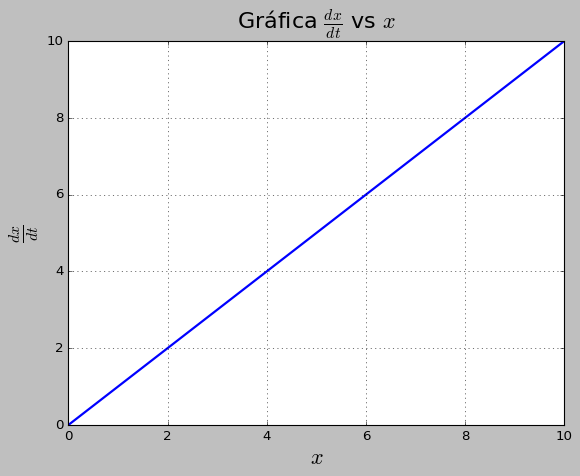

In [ ]:
x=np.arange(0, 10, 0.001)
dxdt = x*1
fig = plt.figure()
plt.plot( x, dxdt, linewidth = 2)
plt.title(r'Gráfica $\frac{dx}{dt}$ vs $x$', fontsize=20)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$\frac{dx}{dt}$', fontsize=20)
plt.grid()
plt.show()

In [ ]:
a=1
t = np.linspace(0,10,1000) 
#Parametros para metodos de paroximación
h = 0.1
tini = 0
tfin = 10
x0 = 0.8

##Solución Analitica
x = x0*np.exp(a*t)

##Aproximación Metodo de Euler
t1,x1 = euler( sistema_1, h, tini, tfin, x0, a)

##Aproximación Método Ruggen-Kutta
t2,x2 = rk4( sistema_1, h, tini, tfin, x0, a)

**Gráfica de compración de solucion analítica y método de aproximación de Euler**

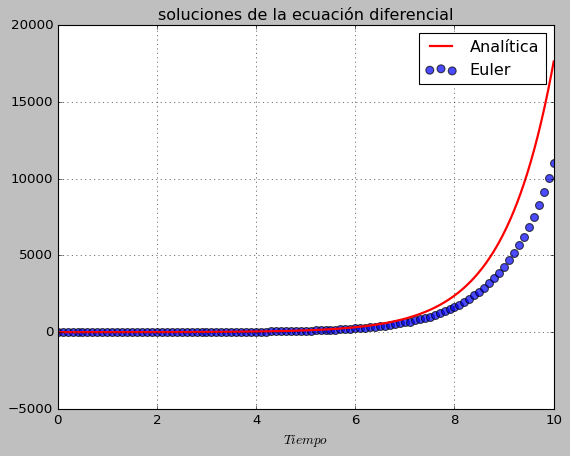

In [ ]:
plt.figure()
# gráfica de analítica:
plt.plot(t, x, 'r', label = 'Analítica', linewidth = 2)
# gráfica de euler:
plt.scatter(t1, x1, label = 'Euler', s = 50, alpha=0.7)

plt.title('soluciones de la ecuación diferencial')
plt.xlim([0, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc='best')
plt.show()

para observar como varia la presicion de los resultados  del metodo de Euler  se varia ¿ el paso de integración  $h$  a medida que éste se hace más pequeño.

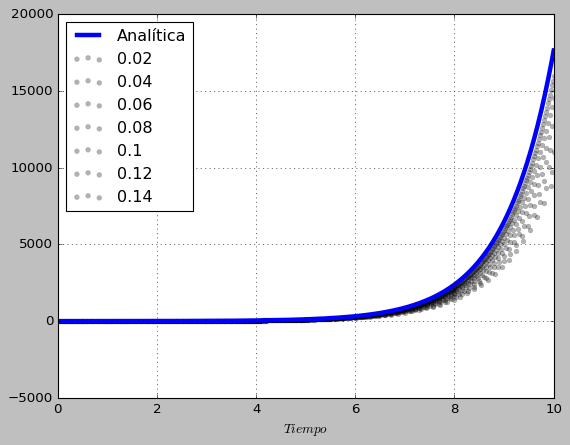

In [ ]:
h_i = np.arange(0,0.15,0.02)
for i in range(1,len(h_i)):
  t1,x1 = euler( sistema_1, h_i[i], tini, tfin, x0, a )
  plt.scatter( t1, x1, color='k', label=h_i[i], linewidth = 0.2, alpha=0.3)

plt.plot(  t, x, 'b', label = 'Analítica', linewidth = 4)
plt.xlim([0, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc = 'best')
plt.show()

**Gráfica de compración de solucion analítica y método de aproximación de Ruggen-kutta**

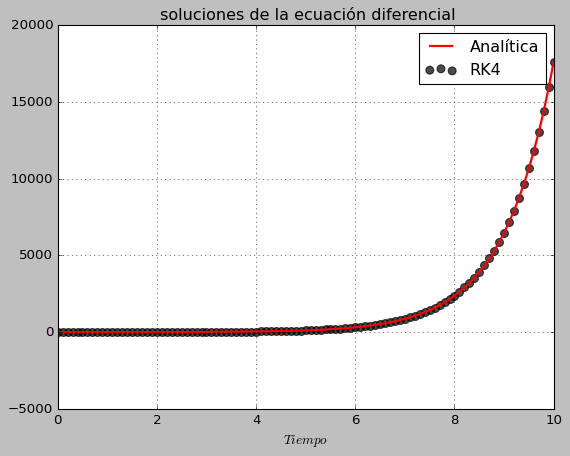

In [ ]:
plt.figure()
# gráfica de analítica:
plt.plot(  t, x, 'r', label = 'Analítica', linewidth = 2)
# gráfica de rk4:
plt.scatter( t2, x2, c = 'k', label = 'RK4', s = 50,alpha=0.7)
plt.title(' soluciones de la ecuación diferencial')
plt.xlim([0, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc='best')
plt.show()

**Grafica de  soluciones de la ecuacion diferencial variando ``X0``**

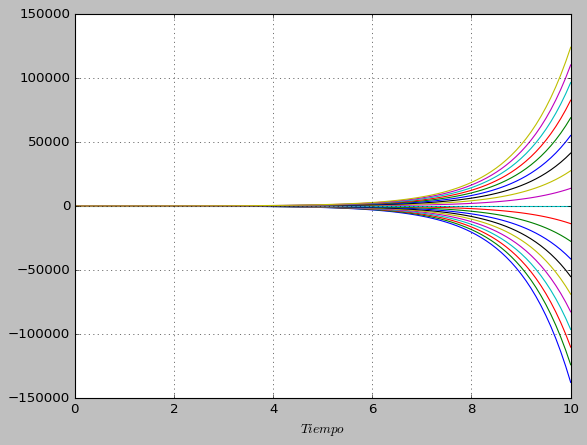

In [ ]:
for i in range(-10,10,1):
  t1,x1 = euler( sistema_1, h, tini, tfin, i, a )
  plt.plot( t1, x1)

plt.xlim([0, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.show()

## FUNCION NO LINEAL

Dada la ecuación diferencial:

\begin{equation}
  \dot{x}=a\cdot sin(x)
\end{equation} 

Siendo $a \in \Re$ una constante cualquiera. A continuación se grafica la solución analítica y las aproximaciones numéricas obtenidas con el método de Euler y con el método Ruggen-kutta.

In [ ]:
def sistema_2(t,x,a):
    x_dot = a*np.sin(x)
    return x_dot

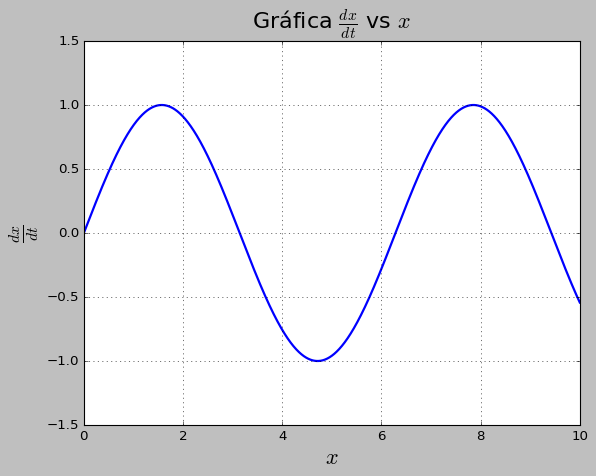

In [ ]:
x=np.arange(0, 10, 0.001)
dxdt = 1*np.sin(x)
fig = plt.figure()
plt.plot( x, dxdt, linewidth = 2)
plt.title(r'Gráfica $\frac{dx}{dt}$ vs $x$', fontsize=20)
plt.ylim([-1.5, 1.5])
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$\frac{dx}{dt}$', fontsize=20)
plt.grid()
plt.show()

In [ ]:
a=1
t = np.linspace(0,10,1000) 
#Parametros para metodos de paroximación
h = 0.1
tini = 0
tfin = 10
x0 = 0.8

##Solución Analitica
x = x0*np.sin(a*t)

##Aproximación Metodo de Euler
t1,x1 = euler( sistema_2, h, tini, tfin, x0, a)

##Aproximación Método Ruggen-Kutta
t2,x2 = rk4( sistema_2, h, tini, tfin, x0, a)

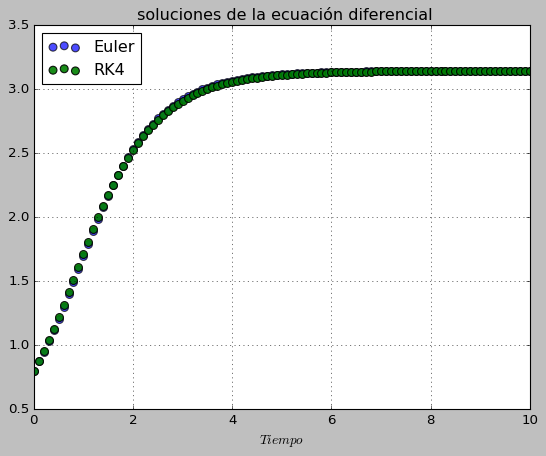

In [ ]:
plt.figure()
# gráfica de euler:
plt.scatter(t1, x1, label = 'Euler', s = 50, alpha=0.7)
plt.scatter( t2, x2, c = 'g', label = 'RK4', s = 50,alpha=0.9)
plt.title(' soluciones de la ecuación diferencial')
plt.xlim([0, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc='best')
plt.show()

Soluciones de la ecuación diferencial variando ``x0``, estas soluciones  son identicas  a la de los dos metodos 

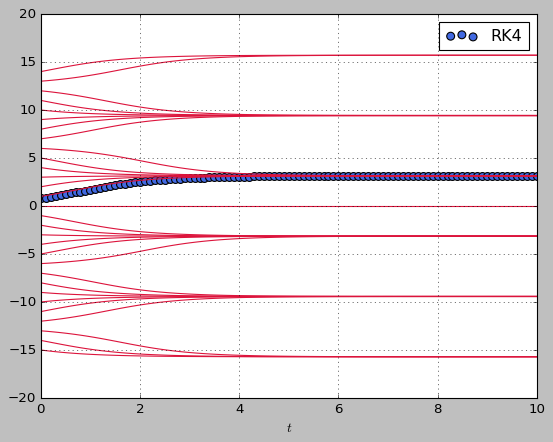

In [ ]:
plt.figure()
# gráfica de analítica:
#plt.plot(  t, x, 'black', label = 'Analytical', linewidth = 2)
# gráfica de euler:
#plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
# gráfica de rk4:
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50)

for i in range(-15,15,1):
    x0=i
    t1,x1 = euler( sistema_2, h, tini, tfin, x0, a )
    plt.plot( t1, x1, c = 'crimson')

plt.xlim([0, tfin])
#plt.ylim([-3.14, 6.28])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()

Se aprecia un punto inestable en 0 y   tiene puntos estables para $x<0$ y $x>0$ 

## Circuito RC Trasladado (Lineal)
Esta ecuación representa el comportamiento en la carga del capacitor, en la cual $V_0$ representa el voltaje inicial, R el valor de la resitencia y C el valor del capacitor.

Se pueden apreciar los flujos a continuació
Dada la ecuación diferencial:

\begin{equation}
  \dot{x}=\frac{1}{RC}x
\end{equation} 

A continuación se grafica la solución analítica y las aproximaciones numéricas obtenidas con el método de Euler y con el método Ruggen-kutta.

In [ ]:
def sistema_3(t,x,a):
    x_dot = -(1/a)*x
    return x_dot

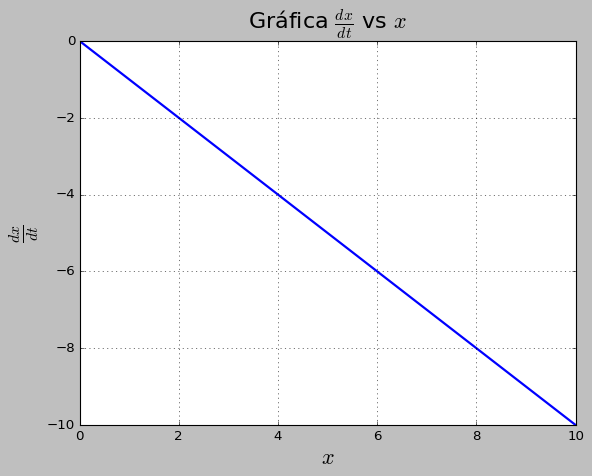

In [ ]:
x=np.arange(0, 10, 0.001)
dxdt = -x*(1/(1000*0.001))
fig = plt.figure()
plt.plot( x, dxdt, linewidth = 2)
plt.title(r'Gráfica $\frac{dx}{dt}$ vs $x$', fontsize=20)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$\frac{dx}{dt}$', fontsize=20)
plt.grid()
plt.show()

In [ ]:
R = 1000
C = 0.001
a=R*C
t = np.linspace(0,10,1000) 
#Parametros para metodos de paroximación
h = 0.1
tini = 0
tfin = 10
x0 = 1

##Aproximación Metodo de Euler
t1,x1 = euler( sistema_3, h, tini, tfin, x0, a)

##Aproximación Método Ruggen-Kutta
t2,x2 = rk4( sistema_3, h, tini, tfin, x0, a)

 Grafica de la comparación de los metodos de eproximación de Euler y Kutta para

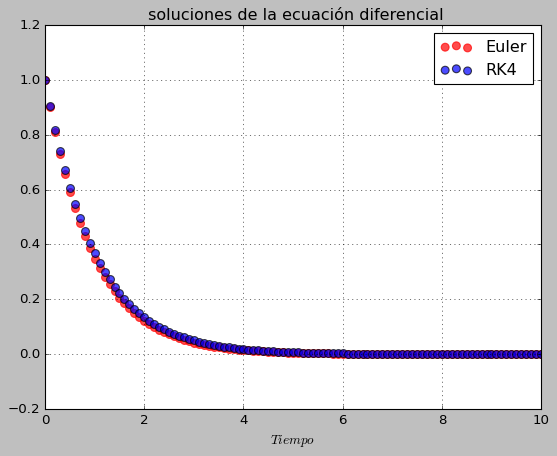

In [ ]:
plt.figure()
# gráfica de analítica:
#plt.plot(t, x, 'r', label = 'Analítica', linewidth = 2)
# gráfica de euler:
plt.scatter(t1, x1,color='r', label = 'Euler', s = 50, alpha=0.7)
plt.scatter(t2, x2, label = 'RK4', s = 50, alpha=0.7)
plt.title(' soluciones de la ecuación diferencial')
plt.xlim([0, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc='best')
plt.show()

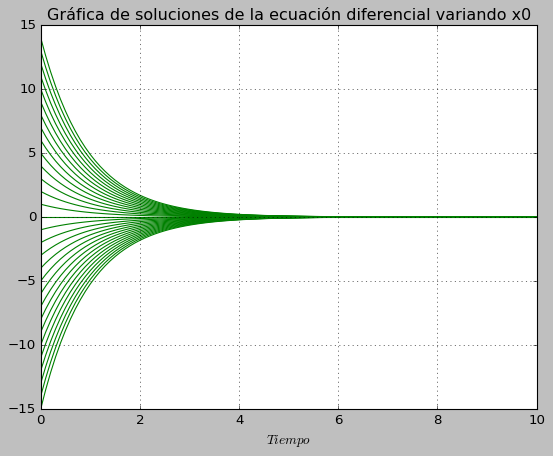

In [ ]:
for i in range(-15,15,1):
    x0=i
    t1,x1 = euler( sistema_3, h, tini, tfin, x0, a )
    plt.plot( t1, x1, c = 'g')
plt.title('soluciones de la ecuación diferencial variando x0' )
plt.xlim([0, tfin])
#plt.ylim([-3.14, 6.28])
plt.xlabel(r'$Tiempo$')
plt.grid()
#plt.legend(loc = 'best')
plt.show()

en la grafica se observa  que tiene un unico punto fijo estable en 0

## Ecuación Logística

La ecuación representa el crecimiento en una población con una taza de crecimiento r, en donde se tiene en cuenta la sobrepoblación y los recursos limitados. Así, mientras más grande sea el N, la taza de crecimiento ($\frac{\dot{N}}{N}$) se hace más pequeña. Cuando la población llega a cierta capacidad (K), la taza de crecimiento se vuelve negativa; la taza de muerte se hace más grande que la de crecimiento.

El flujo de esta función se aprecia a continuación
Dada la ecuación diferencial:

\begin{equation}
  \dot{x}=R\cdot x (1-\frac{x}{K})
\end{equation} 

A continuación se grafican las aproximaciones numéricas obtenidas con el método de Euler y con el método Ruggen-kutta.

In [ ]:
def sistema_4(t,x,a):
  k= 50
  x_dot = (a*x)*(1-(x/k))
  return x_dot

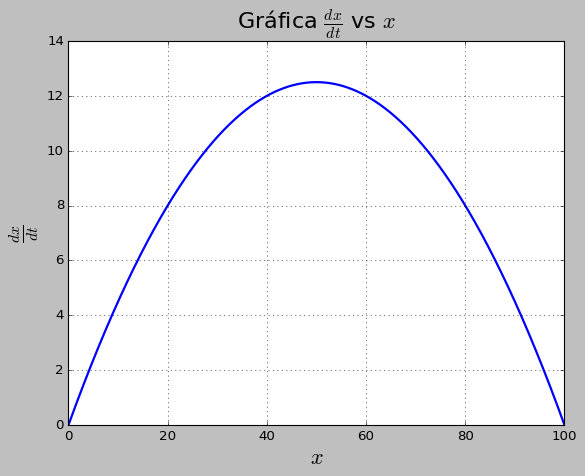

In [ ]:
x=np.arange(0, 100, 0.001)
r=0.5
k=100
dxdt= r*x*(1-(x/k))
fig = plt.figure()
plt.plot( x, dxdt, linewidth = 2)
plt.title(r'Gráfica $\frac{dx}{dt}$ vs $x$', fontsize=20)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$\frac{dx}{dt}$', fontsize=20)
plt.grid()
plt.show()

In [ ]:
a=2
t = np.linspace(0,10,1000) 
#Parametros para metodos de paroximación
h = 0.1
tini = 0
tfin = 10
x0 = 1

##Aproximación Metodo de Euler
t1,x1 = euler( sistema_4, h, tini, tfin, x0, a)

##Aproximación Método Ruggen-Kutta
t2,x2 = rk4( sistema_4, h, tini, tfin, x0, a)

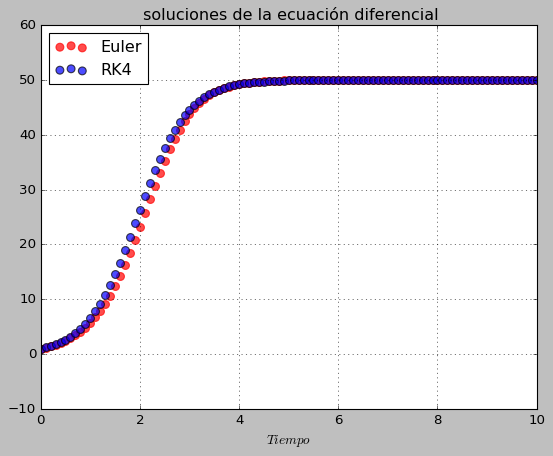

In [ ]:
plt.figure()
# gráfica de analítica:
#plt.plot(t, x, 'r', label = 'Analítica', linewidth = 2)
# gráfica de euler:
plt.scatter(t1, x1,color='r', label = 'Euler', s = 50, alpha=0.7)
plt.scatter(t2, x2, label = 'RK4', s = 50, alpha=0.7)
plt.title(' soluciones de la ecuación diferencial')
plt.xlim([0, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc='best')
plt.show()

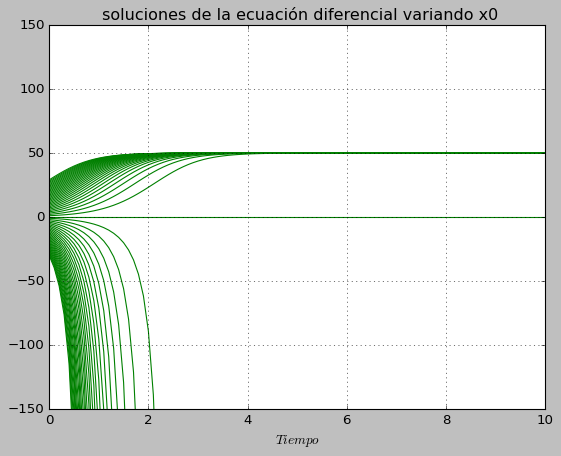

In [ ]:
for i in range(-30,30,1):
    x0=i
    t1,x1 = euler( sistema_4, h, tini, tfin, x0, a )
    plt.plot( t1, x1, c = 'g')
plt.title(' soluciones de la ecuación diferencial variando x0')
plt.xlim([0, tfin])
plt.ylim([-150, 150])
plt.xlabel(r'$Tiempo$')
plt.grid()
#plt.legend(loc = 'best')
plt.show()

En la grafica se puede observar un punto fijo que  tiende al valor de $K$ y es estable, el otro punto fijo es 0 y es inestable